# Temporal and Spatial DataMining
## Exercise 04 Representation Models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Task 1: HMM (Bonus task)

Suppose there are four boxes, each with a different number of red and white balls inside, as follows:
    
          box1     box2     box3     box4

    red:    5        3        6        8

    white:  5        7        4        2

Now take balls from these boxes for T times, record the color after each take, and put them back in the original box.

The initial probability of selecting boxes is uniform distribution, i.g. [0.25, 0.25, 0.25, 0.25].

Then select the next box after following these rules:

* If currently box 1, select box 2
* If it is currently box 2 or 3, the distribution selects the previous or latter box with probabilities of 0.4 and 0.6
* If it is currently box 4, then each stays in box 4 or selects box 3 with a probability of 0.5

**a)** According to the text, build the arrays for **initial probabilities ($\pi$)**, **transition probabilities (A)**, and **output probabilities distributions (B)**.

In [2]:
####################
# Your Code Here   #
####################        

**b)** Implement the function **generate** in the class of HMM. (Only the **generate** function here.)

**Hints** (Update on 12.05):

(1). Add comments in the __init__() to explain the arguments.

In [3]:
class HMM(object):
    def __init__(self, N, M, pi=None, A=None, B=None):
        """
        N: the number of state values
        M: the number of observation values
        pi: initialization probabilities
        A: transition probabilities between states
        B: emission probabilities from a state to an observation
        """
        self.N = N
        self.M = M
        self.pi = pi
        self.A = A
        self.B = B

    def get_data_with_distribute(self, dist): 
        "return the value based on a given probability distribution (dist)"
        
        return np.random.choice(np.arange(len(dist)), p=dist)

    def generate(self, T: int):
        "generate an observation sequence with the length of T" 
        result=[]
        
        i = self.get_data_with_distribute(self.pi)    # Generate the first state based on the initial probability distribution
        o = self.get_data_with_distribute(self.B[i])  # Generate the first observations
        result = [o]
        
        # Generate the remaining status and observation data in sequence
        ####################
    # Your Code Here   #
    ####################        
        return result
    
    def evaluate_forward(self, O):
        '''
        Calculate the probability of the sequence O with the given parameters A, B and Pi.
        O: Observation sequence
        
        '''
        alpha = self.pi * self.B[:,O[0]]
        ####################
    # Your Code Here   #
    ####################  
    
    def evaluate_backward(self, O):
        
        beta = np.ones(self.N)
        ####################
    # Your Code Here   #
    ####################

**c)** Generate an observation sequence with the length of 10 using the class **HMM**

In [4]:
####################
# Your Code Here   #
#################### 
print(hmm.generate(10))

NameError: name 'hmm' is not defined

### HMM-Evaluation problem.
Calculate the conditional probability $P(O|\theta)$ when the parameter $\theta = (\pi, A, B)$ and the observation $O=(o_{1},o_{2},...,o_{T})$ are given.

$P(O|\theta)=P(o_{1},o_{2},...,o_{T}|\theta)=\sum_{Z}P(O,Z|\theta)$

**a)** [**Forward algorithm**](https://en.wikipedia.org/wiki/Forward_algorithm). (Update on 12.05)

Define a forward probability: 

$\alpha_{t}(i) = P(o_{1},o_{2},...,o_{t},z_{t}=s_{i}|\theta)$

which mean the joint probability of the hidden state $s_{i}$ at time t and the observation sequence $o_{1},o_{2},...,o_{t}$ with the given parameters.

Therefore:

$\sum_{i}^{N}\alpha_{T}(i)=\sum_{i}^{N}P(O, z_{T}=s_{i}|\theta)=P(O|\theta)$

**Proof**:
1. $\alpha_{1}(i)=\pi_{i}b_{i}(o_{1})$
2. $\alpha_{t+1}(j) = \sum_{i=1}^{N}a_{ij}b_{j}(o_{t+1})\alpha_{t}(i)$, where $b_{j}(o_{t+1})=P(o_{t+1}|z_{t+1}=s_{j})$

where $a_{ij}=P(z_{t+1}=s_{j}|z_{t}=s_{i})$, $b_{j}(o_{t+1}) = P(o_{t+1}|z_{t+1}=s_{j})$


 **---  Your Text Here ----** 
      

**b)** Implement the function **evaluate_forward** in the class HMM and calculate the probability of the sequence (red, red, white, white, red).

**Hints** (Update on 12.05):

(1) Consider the relationship between the notations ($a_{ij}$, $b_{j}(o_{t+1})$) in the formulas and the attributes (self.A and self.B) of the class HMM

(2) **T** in the formula refers to the length of the sequence.

(3) **N** refers to the number of states.

(4) For proof task, consider the independent observation assumption and the homogeneous markov assumption.

(4) The probability of the sequence(red, red, white, white, red): **0.026862016000000002**

In [ ]:
print(hmm.evaluate_forward([1,0,1,1,1]))

**c)** **Backward algorithm**

Define a forward probability: 

$\beta_{t}(i) = P(o_{T},o_{T-1},...o_{t+1}|z_{t}=s_{i},\theta)$

and the inital value $\beta_{T}(1)=\beta_{T}(2)=....=\beta_{T}(N)=1$.

So, $\beta_{1}(i) = P(o_{T},o_{T-1},...o_{2}|z_{1}=s_{i},\theta)$

**Proof**:

1. $\beta_t(i) = \sum_{j=1}^{N}a_{ij}b_{j}(o_{t+1})\beta_{t+1}(j)$
2. $P(O|\theta)=P(o_{1},o_{2},...o_{T}|\theta)=\sum_{i=1}^{N}b_{i}(o_{1})\pi_{i}\beta_{1}(i)$
3. $P(O|\theta)=\sum_{i=1}^{N}\alpha_{t}(i)\beta_{t}(i)$, for any $t$ with $1 \leq t \leq T$



 **---  Your Text Here ----** 
      

**d)** Implement the function **evaluation_backward** in the class HMM and calculate the probability of the sequence (red, red, white, white, red).

**Hints** (Update on 12.05):

(1) For proof task, consider the independent observation assumption.

(2) The probability of the sequence(red, red, white, white, red): **0.026862016**

In [ ]:
print(hmm.evaluate_backward([1,0,1,1,1]))   

### HMM-Learning Problem.
Estimate the parameters $\theta = (\pi, A, B)$ of the HMM with the given observation $O=(o_{1},o_{2},...,o_{T})$ to get the maximal probability $P(O|\theta)$.

**a)** Proof of EM-algorithm/Baum-Welch algorithm:

1. $\pi_{i}^{(t+1)} = \frac{\alpha_{1}(i)\beta_{1}(i)}{P(O|\theta^{(t)})}$

2. $a_{ij}^{(t+1)}=\frac{\sum_{t=1}^{T-1}\alpha_{t}(i)\beta_{t+1}(j)a_{ij}b_{j}(o_{t+1})}{\sum_{t=1}^{T-1}\alpha_{t}(i)\beta_{t}(i)}$

3. $b_{jk}^{(t+1)}=\frac{\sum_{t=1}^{T}\alpha_{t}(j)\beta_{t}(j)I(o_{t}=k)}{\sum_{t=1}^{T}\alpha_{t}(j)\beta_{t}(j)}$

**Hint**:

* $\alpha$ and $\beta$ are defined in the forward/backward algorithms.
* Subscript $t$ and superscript $(t)$ have different meanings. Subscript $t$ means the $t_{th}$ observation in the sequence. Superscript $(t)$ means the $t_{th}$ iteration in EM algorithm
* $I(o_{t}=k)=1$ and $I(o_{t} \neq k)=0$
* $P(O|\theta)=\sum_{i=1}^{N}\alpha_{t}(i)\beta_{t}(i)$


 **---  Your Text Here ----** 
    

**b)** Implement the function **generate** and **fit**. Refer to the formulars in (a) of **HMM-learning problem**.

In [ ]:
class HMM(object):
    def __init__(self, N, M, iteration=50):
        self.N = N
        self.M = M
        self.iter = iteration
        
    def get_data_with_distribute(self, dist): 
        "return the value based on a given probability distribution (dist)"
        
        return np.random.choice(np.arange(len(dist)), p=dist)
    
    def generate(self, T: int):
        "generate an observation sequence with the length of T" 
        result=[]
        
        i = self.get_data_with_distribute(self.pi)    # Generate the first state based on the initial probability distribution
        o = self.get_data_with_distribute(self.B[i])  # Generate the first observations
        result = [o]
        
        # Generate the remaining status and observation data in sequence
        ####################
    # Your Code Here   #
    ####################        
        return result
    
    def fit(self, O):
        '''
        Estimate the parameters
        '''
        # Initialize the parameters: pi, A, B
        self.pi = np.random.sample(self.N)
        self.A = np.ones((self.N,self.N)) / self.N
        self.B = np.ones((self.N,self.M)) / self.M
        self.pi = self.pi / self.pi.sum()
        
        T = len(O)
        for it in range(self.iter):
            # according to the formulars shown above(subtask a), update the parameters.
            alpha, beta = self.get_alpha_beta(O)
            ####################
    # Your Code Here   #
    ####################

    def get_alpha_beta(self, O):
        '''
        Calculate the forward/backward probability alpha and beta
        '''
        T = len(O)
        alpha = np.zeros((T,self.N))
        alpha[0,:] = self.pi * self.B[:,O[0]]
        for i in range(T-1):
            o = O[i+1]
            alpha[i+1,:] = np.sum(self.A * alpha[i].reshape(-1,1) * self.B[:,o].reshape(1,-1), axis=0)

        beta = np.ones((T,self.N))
        for j in range(T-1,0,-1):
            for i in range(self.N):
                beta[j-1,i] = np.sum(self.A[i,:] * self.B[:,O[j]] * beta[j])

        return alpha, beta

**c)** Plot the original observation data and the generated observation data.

**Hint**: (Update on 12.05)

(1) The output figure is given. 

In [ ]:
import matplotlib.pyplot as plt
def triangle_data(T):
    '''
    generate the squence of triangular wave
    '''
    data = []
    for x in range(T):
        x = x % 6
        data.append(x if x <= 3 else 6-x)
    return data

data = np.array(triangle_data(30))
hmm = HMM(10, 4, 50)
hmm.fit(data)               # Estimate the parameters according to the data
gen_obs = hmm.generate(30)  # generate data based one the estimated parameters

In [ ]:
x = np.arange(30)
####################
# Your Code Here   #
####################

**d)** Additional task: try to change the parameter **N**, **M**, **iteration_nr** in subtask c. What could you find? Why?

**Hint** (Update on 12.05)

(1) For example, try HMM(2, 4, 100) or HMM(10, 20, 5)

In [ ]:
####################
# Your Code Here   #
####################

### Task 2: Kalman Filter

Consider a car on a frictionless, infinitely long straight track. The car initially stopped at position 0.   
We measure the position of the car every $\Delta t$ seconds, but this measurement is inaccurate; we want to build a model about its position and speed.

#### 1. Init phase
The position and speed of the car can be described by the linear state space as follows:
$$X_k = \begin{bmatrix}x\\\dot{x}\end{bmatrix}$$

Where $\dot{x}$ is the velocity, which is the derivative of position with respect to time. Suppose the initial position is 0 and velocity is 1.
$$X_0 = \begin{bmatrix}0\\1\end{bmatrix}$$

$\textbf{P}$ is the process covariance matrix. Suppose we do not know exactly the initial position and velocity. In that case, the covariance matrix can be initialized as a matrix whose diagonal elements are B, and B takes an appropriate larger number. 
$$\textbf{P}_{0} = \begin{bmatrix} B & 0 \\ 0 & B \end{bmatrix}$$

If we know the exact initial position, and we give a covariance matrix:
$$\textbf{P}_{0} = \begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}$$

In our case we set:
$$\textbf{P}_{0} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

#### 2. Prediction phase
We assume that the relationship between time $k-1$ and time $k$ is as follows:
$$\textbf{X}^p_k = \textbf{F X}_{k-1} + \textbf{w}_k$$
The superscript $p$ represents the prior prediction of $\textbf{X}$ at time $k$.    
$\textbf{F}$ is state transistion matrix:
$$\textbf{F} = \begin{bmatrix} 1 & \Delta t \\ 0 & 1 \end{bmatrix}$$
Suppose we measure the state of the car every 1 second, then:
$$\textbf{F} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$$
$\textbf{w}_k$ (system output error) conforms to a normal distribution Q with a mean value of 0 and a standard deviation of $\sigma_a$.  
$$\sigma_a = \begin{bmatrix} 0.5 & 0 \\ 0 & 0.5 \end{bmatrix}$$
For process covariance matrix P, the relationship between time $k-1$ and time $k$ is as follows
$$\textbf{P}^p_k = \textbf{F }\textbf{P}_{k-1}\textbf{ F}^T + \textbf{Q}$$
The superscript $p$ represents the prior prediction of $\textbf{P}$  at time k

#### 3. Measurement phase
At every moment, we measure its position and velocity $\textbf{Z}_{k}$, and the measurement is disturbed by noise $\textbf{v}_{k}$:
$$\textbf{Z}_{k} = \textbf{H X}_{k} + \textbf{v}_{k}$$
We assume that the noise $\textbf{v}_{k}$ (measurement error) obeys a normal distribution R, with a mean value of 0 and a standard deviation of $\sigma_z$.
$$\sigma_z = \begin{bmatrix} 0.5 & 0 \\ 0 & 0.5 \end{bmatrix}$$
$\textbf{H} $ is measurement function:
$$\textbf{H} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$

#### 4. Update phase
Calculate Kalman Gain Phase:
$$\textbf{K}_k = \textbf{P}^p_k\textbf{ H}^T \textbf{S}_{k}^{-1}$$ 
$$\textbf{S}_{k} = \textbf{H}\textbf{P}^{p}_{k}\textbf{H}^{T} + \textbf{R}$$
The posterior estimate of $P_k$ is:
$$\textbf{P}_k = (\textbf{I} - \textbf{K}_k \textbf{ H})\textbf{P}^p_k$$
The posterior estimate of $X_k$ is:
$$\textbf{X}_k = \textbf{X}^p_k + \textbf{K}_k [\textbf{Z}_{k} - \textbf{ H}\textbf{ X}^p_k]$$

#### 5. Repeat prediction, measurement and update phase
$$\textbf{X}_{k-1} =  \textbf{X}_{k}$$
$$\textbf{P}_{k-1} =  \textbf{P}_{k}$$

**a)** Implement the Kalman Filter manually with the help of above formulas.

In [6]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [57]:
#----------Init Phase----------- #

x = np.matrix([[0.0],
               [1.0]])                # The ground truth of initial position and velocity
x_post= np.matrix([[0.0],   
                   [1.0]])            # The posterior estimation of initial position and velocity

Q = np.matrix([[0.5, 0.0],
               [0.0, 0.5]])           # Process noise covariance matrix, constant
R = np.matrix([[0.5, 0.0],
               [0.0, 0.5]])           # Measurement noise covariance matrix, constant

F = np.matrix([[1, 1],
               [0, 1]])               # State transistion matrix, constant
H = np.matrix([[1.0, 0.0],
               [0.0, 1.0]])           # Measurement function, constant
P = np.matrix([[1.0, 0.0],
               [0.0, 1.0]])           # Process covariance matrix

x_real_list = x                       # The list to save real positions and velocities
z_list = []                           # The list to save the measurements of position and velocity
x_prior_list = []                     # The list to save the prior estimations of position and velocity
x_post_list = [x_post]                  # The list to save the posterior estimations of position and velocity

In [58]:
N_step = 100

P_list = [P]


for i in range(0, N_step):
    
    #---- State transition of ground truth ----#
    x = F*x
    x_real_list = np.concatenate((x_real_list, x), axis=1)
    
    #------------ Prediction Phase ------------#
    X_p = F * x_post_list[i] + rd.multivariate_normal([0,0], Q, 1).T
    P_p = F*P_list[i]*F.T + Q
    x_prior_list.append(X_p)
    
    #------------ Measurement Phase ------------#
    Z_k = H*x + rd.multivariate_normal([0,0], R, 1).T
    z_list.append(Z_k)
    
    #--------------- Update Phase --------------#
    S_k = H*P_p*H.T + R
    K_k = P_p*H.T*(S_k)**-1
    P_k = (np.eye(x.shape[0]) - K_k*H)*P_p    # posterior, mit ^p ist prior
    X_k = X_p + K_k*(Z_k - H*X_p)

    # update 
    P_list.append(P_k)
    x_post_list.append(X_k)



**b)** Compare the **true values**, **the measurements**, **the prior and posterior prediction** regarding the **position** and **velocity** in graphics.

In [59]:
x_real_list.shape

print(len(z_list))
np.array(x_prior_list).squeeze().shape

100


(100, 2)

x_real_list [[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99. 100.]]
x_real_list [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1.]]


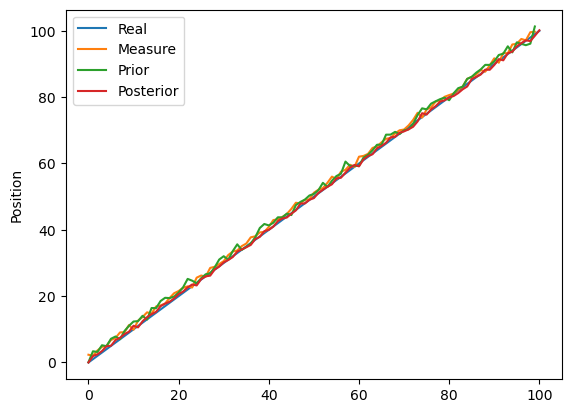

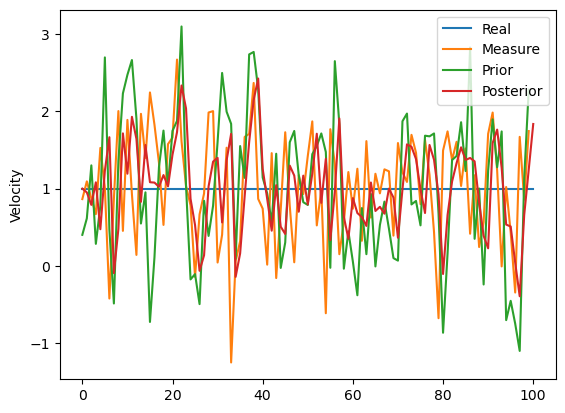

In [60]:
legend_text = ['Real', 'Measure', 'Prior', 'Posterior']

for i, feat in enumerate(['Position', 'Velocity']):
    print('x_real_list', x_real_list[i,:].flatten())
    plt.figure()
    plt.plot(np.array(x_real_list[i,:]).flatten(), label=legend_text[0])
    plt.plot(np.array(z_list).squeeze()[:,i], label=legend_text[1])
    plt.plot(np.array(x_prior_list).squeeze()[:,i], label=legend_text[2])
    plt.plot(np.array(x_post_list).squeeze()[:,i], label=legend_text[3])
    plt.ylabel(feat)
    plt.legend()
#plt.plot(x_real_list[0,:], x_real_list[1,:], 'r-', label=legend_text[0])

plt.show()

### Task 3: Orthogonal Polynomials for Shape-Space-Representation

**a)** What are the benefits of using a subspace representation (i.e. Shape Space Representation)?


 - fewer dimensions -> less computational effort, less memory consumption
 


**b)** What kind of information can be reflected in the coefficients of the subspace polynomial shape?


- coefficients =^ variane along the axis


**c)** Derive the optimal Solution (in the least-squares sense) for the weight vector (coefficients) $\mathbf{w}^{\text{opt}}$ from the linear Problem:

- $\text{min}\sum_{n=1}^{N}\left(\left(\sum_{k=1}^{K}w_k\cdot f_k(t_n) \right)-y_n\right)^2$

- $\sum_1^N (f(x_n) - y_n)^2$ $f(x_n) = \sum_1^K w_k * f_k(t_n)$

- $ \mathbf{w} = (w_0, w_1, w_2 \dots)^T \mathbf{y} = (y_0, y_1, y_2 \dots)^T \mathbf{x} = (x_0, x_1, x_2 \dots)^T$

- Dann diese E Matrix mit $f_0(x_0)$ bis $f_0(x_n)$ in der ersten $f_1(x_0) \dots$ etc bis zur k-ten Spalte

- min $ \| \mathbf{F} \mathbf{w} - \mathbf{y}\|^2$

- $w_{opt} = (\mathbf{F}^T \mathbf{F})^{-1} \mathbf{F}^T \mathbf{y} = \mathbf{F}^*\mathbf{y}$

- nach w ableiten und gleich 0 setzen

- $2 \mathbf{F}^T \mathbf{y} = 2 \mathbf{F}^T\mathbf{F}\mathbf{w}$

- nach $w_{opt}$ auflösen

**d)** What are the properties of the polynomials in the method presented as shape space represetation? (i.e. advantages compared to monomial-based approaches?)


 **---  Your Text Here ----** 


**e)** How is the measure of the similarity of the time series defined and what is the dimension of the subspace in which this measure is applied?


 **---  Your Text Here ----** 
